
<center><h1 style="font-family: Trebuchet MS; padding: 5px; font-size: 48px; color: Blue; text-align: center; line-height: 1;"><b>Analysis For </br><span style="color: #000000; font-size: 30px;">ArzEn-MultiGenre: A Comprehensive Parallel Dataset Analysis</span></b></h1></center>
<center><img src="https://t4.ftcdn.net/jpg/03/49/38/23/360_F_349382308_jqIgbOIzRi034AjFSYpinhD5fOlkX4Y6.jpg" ></center>


### DATASET : ArzEn-MultiGenre

**Description**
ArzEn-MultiGenre is a manually translated and aligned parallel dataset of Egyptian Arabic (Arz) and English (En), encompassing 25,557 sentence pairs across three genres: novels (5,226 sentence pairs), subtitles (17,265 sentence pairs), and songs (3,066 sentence pairs). It serves as a benchmark for machine translation models, aids in fine-tuning large language models, and facilitates research in translation studies, cross-linguistic analysis, and lexical semantics.

Three distinct features set ArzEn-MultiGenre apart from existing Arz-En parallel datasets:
1. It includes three genres previously unrepresented in Arz-En parallel datasets.
2. It is manually translated and aligned, differentiating it from crowdsourced Arz-En parallel datasets.
3. It offers a substantial volume of data compared to some existing Arz-En parallel datasets.

In terms of word tokens, the dataset comprises 154,658 Arabic word tokens and 210,068 English word tokens. The vocabulary encompasses 29,179 Arabic word types and 18,131 English word types, with a type-token ratio of 19% for Arabic and 9% for English. Segment lengths vary across genres, with novels featuring 54 one-word segments, 1,269 segments with 2-5 words, and 3,903 segments with 6 or more words. Similarly, subtitles display varied segment lengths, with 2,689 one-word segments, 9,252 segments with 2-5 words, and 5,324 segments with 6 or more words. Songs, however, exhibit fewer segments overall.
<a id="0"></a>


---

## **Table of Contents:**
1. [Context](#1)
2. [Import Libraries](#2)
3. [Import Data](#3)
4. [Data Cleaning](#4)
    1. [Removing Unwanted Columns](#5)
5. [Data Understanding](#6)
    1. [Number of Characters Present in Each Sentence](#8)
    2. [Number of Words Appearing in Each description](#9)
    3. [Check the Average Word Length in Each Sentence](#10)
    4. [Most Frequent Word](#13)
    5. [Visualizing Categories Using Pie Chart ](#14)
    6. [Number of Characters Present in Each Sentence According to the Category](#16)
    7. [Number of Words Appearing in Each Sentence According To The Category](#17)
    8. [Average Word Length in Each Sentence For Each Category](#18)
    9. [Generating Word Cloud For Sentences ](#19)
    10. [Generating Word Cloud For Sentences per category](#20)
7. [Tokenization Analysis](#21)
    1. [Facebppk-NLLB-200-Distilled-600M](#22)
    2. [Facebook-mBART-Large-CC](#23)
    3. [Facebook-m2m100_418M](#24)
    4. [Helsinki-NLP-OPUS-mt-en-ar](#25)



<a id='1'></a>

---

<p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:300%;text-align:center;border-radius:20px 20px;">Context</p>

### Dataset consists of:
1. **Egyption Text** : Egyption Arabic Sentences
2. **English Text** : English Sentences 
3. **Category** :  Category from which this sentence is taken
4. **Sub Category** : More specific category from which this sentence is taken

 <p><a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a></p>

--------
<a id='2'></a>
 <p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:20px 20px;">Import Libraries</p>
<a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a>

In [1]:
!pip install arabic_reshaper -q
!pip install ar_wordcloud -q

from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display
from ar_wordcloud import ArabicWordCloud

import pandas as pd # to work with csv files
import numpy as np

# matplotlib imports are used for visualisation and to plot confusion matrices for the classifiers
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# pre-processing of text
import string
import re

# import time function from time module to track the training duration
from time import time

import warnings
warnings.filterwarnings('ignore')

sns.set()

---------
<a id="3"></a>

<p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:20px 20px;">Import Data</p>
<a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a>

In [2]:
data = pd.read_excel('/kaggle/input/arzen-multigenre/ArzEn-MultiGenre-version-1.xlsx')
data.head()

egyption_Text  \
0                                      الأمير الصغير   
1                            أنطوان دي سانت إكزوبيري   
2                                        الفصل الأول   
3  في مره، لما كان عندي ست سنين، شفت صوره روعه، ف...   
4      وكانت عباره عن تعبان من نوع البوا بيبلع فهد.    

                                        english_Text category  \
0                                 The little prince    Novels   
1                            Antoine De Saint-Exuper   Novels   
2                                          Chapter 1   Novels   
3  Once when I was six years old I saw a magnific...   Novels   
4  It was a picture of a boa constrictor in the a...   Novels   

        sub_category  
0  the-little-prince  
1  the-little-prince  
2  the-little-prince  
3  the-little-prince  
4  the-little-prince

In [3]:
data2 = data.copy()

In [4]:
data.shape

(26074, 4)

----------
<a id="4"></a>

<p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:20px 20px;">Data Cleaning</p>

<a id="5"></a>
---------
<a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26074 entries, 0 to 26073
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   egyption_Text  24933 non-null  object
 1   english_Text   24647 non-null  object
 2   category       26074 non-null  object
 3   sub_category   26074 non-null  object
dtypes: object(4)
memory usage: 814.9+ KB


In [6]:
data.describe()

egyption_Text english_Text   category  sub_category
count          24933        24647      26074         26074
unique         16827        21426          3           307
top          خلاويص؟        What?  Subtitles  the-stranger
freq              76          106      17770          1955

In [7]:
data.duplicated().sum()

1763

In [8]:
data.isna().sum()

egyption_Text    1141
english_Text     1427
category            0
sub_category        0
dtype: int64

In [9]:
null_rows = data[data.isnull().any(axis=1)]
null_rows

egyption_Text  \
19                                                   NaN   
3265                                                 NaN   
3281                                                 NaN   
3282                                                 NaN   
3923   البنت جريت على الباب وقالت للظابط إن ريمون كان...   
...                                                  ...   
21837                                       خد بالك لتقع   
21888                                                طيب   
21917                                       قولت أردهالك   
21945                                           على فكرة   
24087                                               حاضر   

                                            english_Text   category  \
19     The grown-ups’ response, this time, was to adv...     Novels   
3265                                 Rest well, old man.     Novels   
3281                                                 NaN     Novels   
3282                                                         Novels   
3923                                                 NaN     Novels   
...                                                  ...        ...   
21837                                                NaN  Subtitles   
21888                                                NaN  Subtitles   
21917                                                NaN  Subtitles   
21945                                                NaN  Subtitles   
24087                                                NaN  Subtitles   

                  sub_category  
19           the-little-prince  
3265   the-old-man-and-the-sea  
3281   the-old-man-and-the-sea  
3282   the-old-man-and-the-sea  
3923              the-stranger  
...                        ...  
21837  paranormal-episode-1-v2  
21888  paranormal-episode-1-v2  
21917  paranormal-episode-1-v2  
21945  paranormal-episode-1-v2  
24087  paranormal-episode-4-v1  

[1518 rows x 4 columns]

In [10]:
import pandas as pd

# Assuming df_translation is your translation DataFrame with null values
# And df_fill is the DataFrame that contains potential fill values

# Find rows with null values in English text and non-null values in Arabic text
null_english_rows = data[data['english_Text'].isnull() & data['egyption_Text'].notnull()]

# Iterate over rows with null English text and non-null Arabic text
for index, row in null_english_rows.iterrows():
    arabic_text = row['egyption_Text']
    
    # Check if the Arabic text is present in df_fill
    fill_rows = data2[data2['egyption_Text'] == arabic_text]
    
    # If there's a match and the fill value is not null, fill the null English text
    if not fill_rows.empty and not fill_rows['english_Text'].isnull().all():
        data.at[index, 'english_Text'] = fill_rows.iloc[0]['english_Text']

# Find rows with null values in Arabic text and non-null values in English text
null_arabic_rows = data[data['egyption_Text'].isnull() & data['english_Text'].notnull()]

# Iterate over rows with null Arabic text and non-null English text
for index, row in null_arabic_rows.iterrows():
    english_text = row['english_Text']
    
    # Check if the English text is present in df_fill
    fill_rows = data2[data2['english_Text'] == english_text]
    
    # If there's a match and the fill value is not null, fill the null Arabic text
    if not fill_rows.empty and not fill_rows['egyption_Text'].isnull().all():
        data.at[index, 'egyption_Text'] = fill_rows.iloc[0]['egyption_Text']

# Print the updated DataFrame
print("Updated DataFrame:")
data


Updated DataFrame:


egyption_Text  \
0                                          الأمير الصغير   
1                                أنطوان دي سانت إكزوبيري   
2                                            الفصل الأول   
3      في مره، لما كان عندي ست سنين، شفت صوره روعه، ف...   
4          وكانت عباره عن تعبان من نوع البوا بيبلع فهد.    
...                                                  ...   
26069                                    المتاهة هي عقلك   
26070                             أوعى تسلم عقلك يا رفعت   
26071                                      لوي هو لوسيفر   
26072                    قانون رفعت رقم واحد بعد التعديل   
26073              بالتأكيد هناك ما يسمى ما وراء الطبيعة   

                                            english_Text   category  \
0                                     The little prince      Novels   
1                                Antoine De Saint-Exuper     Novels   
2                                              Chapter 1     Novels   
3      Once when I was six years old I saw a magnific...     Novels   
4      It was a picture of a boa constrictor in the a...     Novels   
...                                                  ...        ...   
26069                             The maze is your mind.  Subtitles   
26070                   Never give up your mind, Refaat.  Subtitles   
26071                                  Louis is Lucifer.  Subtitles   
26072                    Refaat’s law number one amended  Subtitles   
26073  There is definitely such a thing as the parano...  Subtitles   

                  sub_category  
0            the-little-prince  
1            the-little-prince  
2            the-little-prince  
3            the-little-prince  
4            the-little-prince  
...                        ...  
26069  paranormal-episode-6-v2  
26070  paranormal-episode-6-v2  
26071  paranormal-episode-6-v2  
26072  paranormal-episode-6-v2  
26073  paranormal-episode-6-v2  

[26074 rows x 4 columns]

In [11]:
data.duplicated(subset = ["egyption_Text","english_Text"]).sum()

3101

In [12]:
# Rows containing duplicate data
duplicate_rows_data = data[data.duplicated(subset=["egyption_Text", "english_Text"])]
print("number of duplicate rows:", duplicate_rows_data.shape)
data=data.drop_duplicates(subset=["egyption_Text", "english_Text"])

number of duplicate rows: (3101, 4)


In [13]:
duplicate_rows_data

egyption_Text                      english_Text   category  \
78            إرسملي خروف.                  Draw me a sheep.     Novels   
711    ومشي الأمير الصغير.  And the little prince went away.     Novels   
727            صباح الخير.                     Good morning.     Novels   
758             مساء الخير                     Good evening.     Novels   
772           صباح الخير.                      Good morning.     Novels   
...                    ...                               ...        ...   
26062              خلاويص؟                     Ready or not?  Subtitles   
26063                  لسه                           Not yet  Subtitles   
26064              خلاويص؟                     Ready or not?  Subtitles   
26069      المتاهة هي عقلك            The maze is your mind.  Subtitles   
26071        لوي هو لوسيفر                 Louis is Lucifer.  Subtitles   

                  sub_category  
78           the-little-prince  
711          the-little-prince  
727          the-little-prince  
758          the-little-prince  
772          the-little-prince  
...                        ...  
26062  paranormal-episode-6-v2  
26063  paranormal-episode-6-v2  
26064  paranormal-episode-6-v2  
26069  paranormal-episode-6-v2  
26071  paranormal-episode-6-v2  

[3101 rows x 4 columns]

In [14]:
data.dropna(inplace=True)

---------
<a id="6"></a>

<p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:20px 20px;">Data Uderstanding</span></p>
<a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a>

In [15]:
for col in data.columns:
    print('{} : {} unique value(s)'.format(col, data[col].nunique()))

egyption_Text : 16709 unique value(s)
english_Text : 21365 unique value(s)
category : 3 unique value(s)
sub_category : 306 unique value(s)


In [16]:
class_df = data.groupby('egyption_Text').count()['english_Text'].reset_index().sort_values(by='english_Text',ascending=False)[:15]
class_df.style.background_gradient()

In [17]:
class_df = data.groupby('english_Text').count()['egyption_Text'].reset_index().sort_values(by='egyption_Text',ascending=False)[:15]
class_df.style.background_gradient()

In [18]:
data['number_of_characters_english_text']= data['english_Text'].str.len()
data['number_of_characters_egyption_text']= data['egyption_Text'].str.len()
data

egyption_Text  \
0                                          الأمير الصغير   
1                                أنطوان دي سانت إكزوبيري   
2                                            الفصل الأول   
3      في مره، لما كان عندي ست سنين، شفت صوره روعه، ف...   
4          وكانت عباره عن تعبان من نوع البوا بيبلع فهد.    
...                                                  ...   
26067                       لا مزيد من المتاهات يا عزيزي   
26068                        ربما ألعاب أخرى أكثر امتاعا   
26070                             أوعى تسلم عقلك يا رفعت   
26072                    قانون رفعت رقم واحد بعد التعديل   
26073              بالتأكيد هناك ما يسمى ما وراء الطبيعة   

                                            english_Text   category  \
0                                     The little prince      Novels   
1                                Antoine De Saint-Exuper     Novels   
2                                              Chapter 1     Novels   
3      Once when I was six years old I saw a magnific...     Novels   
4      It was a picture of a boa constrictor in the a...     Novels   
...                                                  ...        ...   
26067                          No more mazes, my friend.  Subtitles   
26068  Perhaps we should play some other games that a...  Subtitles   
26070                   Never give up your mind, Refaat.  Subtitles   
26072                    Refaat’s law number one amended  Subtitles   
26073  There is definitely such a thing as the parano...  Subtitles   

                  sub_category  number_of_characters_english_text  \
0            the-little-prince                                 18   
1            the-little-prince                                 23   
2            the-little-prince                                  9   
3            the-little-prince                                128   
4            the-little-prince                                 73   
...                        ...                                ...   
26067  paranormal-episode-6-v2                                 25   
26068  paranormal-episode-6-v2                                 67   
26070  paranormal-episode-6-v2                                 32   
26072  paranormal-episode-6-v2                                 31   
26073  paranormal-episode-6-v2                                 51   

       number_of_characters_egyption_text  
0                                      13  
1                                      23  
2                                      11  
3                                     110  
4                                      45  
...                                   ...  
26067                                  28  
26068                                  27  
26070                                  22  
26072                                  31  
26073                                  37  

[22688 rows x 6 columns]

<a id="8"></a>

## *Number of Characters Present in Each Sentence of desc* :

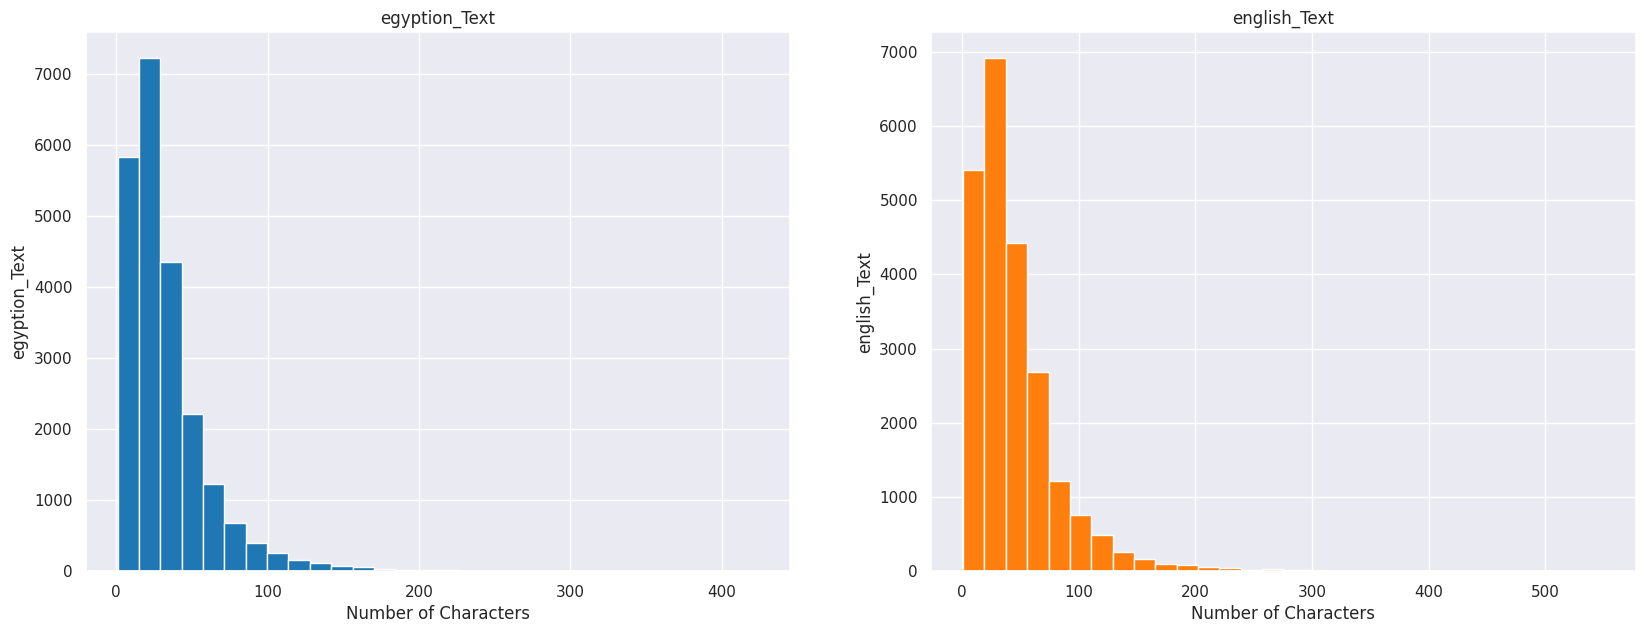

In [19]:
fig,plotcanvas=plt.subplots(1,2,figsize=(20,7))
cols = data.columns.tolist()[:2]
colors = list(mcolors.TABLEAU_COLORS.values())
for y in range(2):
    sentlen = data[cols[y]].str.len()
    plotcanvas[y].hist(sentlen, color = colors[y], bins=30)
    plotcanvas[y].set_title(cols[y])
    plotcanvas[y].set_xlabel('Number of Characters')
    plotcanvas[y].set_ylabel(cols[y])

In [20]:
print(f"Maximun number of Character in Egyption Text is: {data['number_of_characters_egyption_text'].max()}\n\t\t\t  while English Text is: {data['number_of_characters_english_text'].max()}")

Maximun number of Character in Egyption Text is: 424
			  while English Text is: 550


<a id="9"></a>

## *Number of Words Appearing in Each Sentence* :

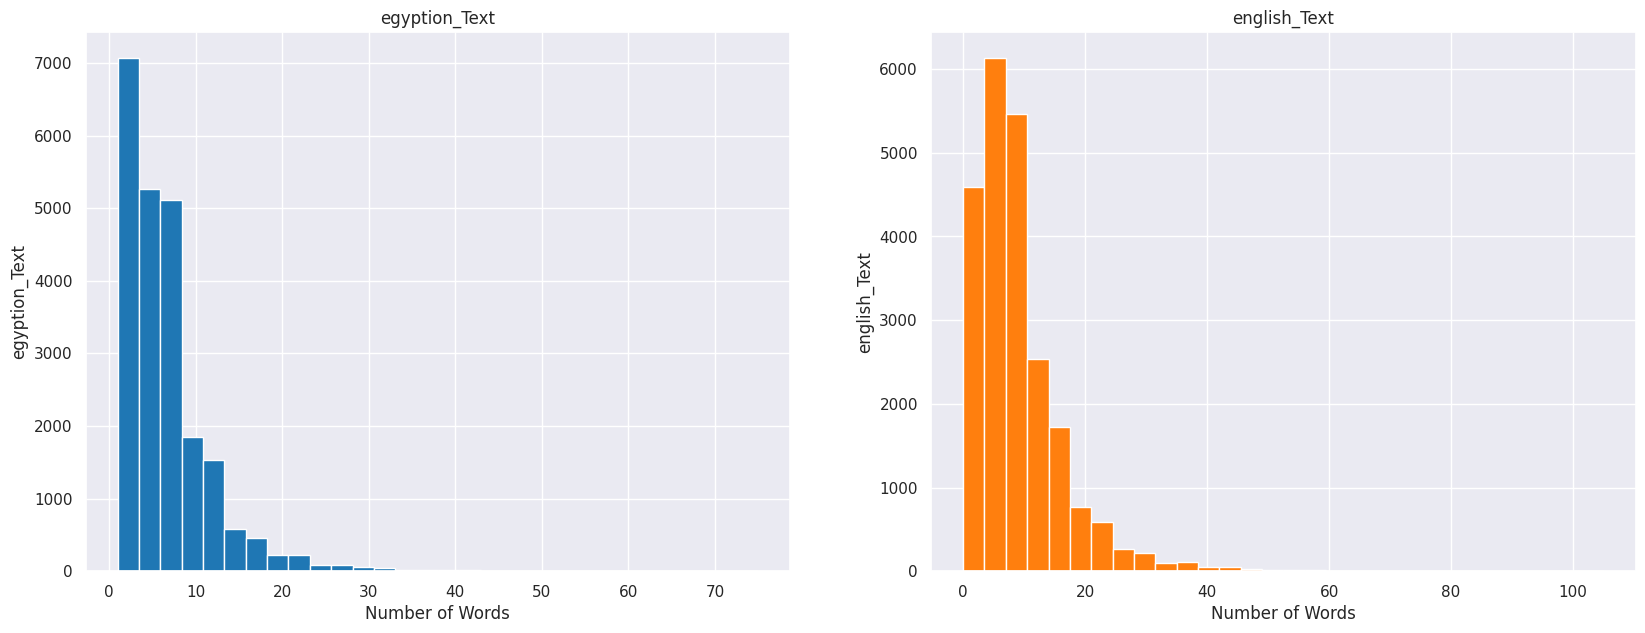

In [21]:
fig,plotcanvas=plt.subplots(1,2,figsize=(20,7))
cols = data.columns.tolist()[:2]
colors = list(mcolors.TABLEAU_COLORS.values())
for y in range(2):
    sentlen = data[cols[y]].str.len()
    plotcanvas[y].hist(data[cols[y]].str.split().map(lambda x: len(x)), color = colors[y], bins=30)
    plotcanvas[y].set_title(cols[y])
    plotcanvas[y].set_xlabel('Number of Words')
    plotcanvas[y].set_ylabel(cols[y])

In [22]:
data['number_of_words_english_text'] = data['english_Text'].str.split().map(lambda x: len(x))
data['number_of_words_egyption_text'] = data['egyption_Text'].str.split().map(lambda x: len(x))
print(f"Maximun number of Character in Egyption Text is: {data['number_of_words_egyption_text'].max()}\n\t\t\t  while English Text is: {data['number_of_words_english_text'].max()}")

Maximun number of Character in Egyption Text is: 75
			  while English Text is: 105


<a id="10"></a>

## *Check the Average Word Length in Each Sentence* :

In [23]:
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist(bins=30)

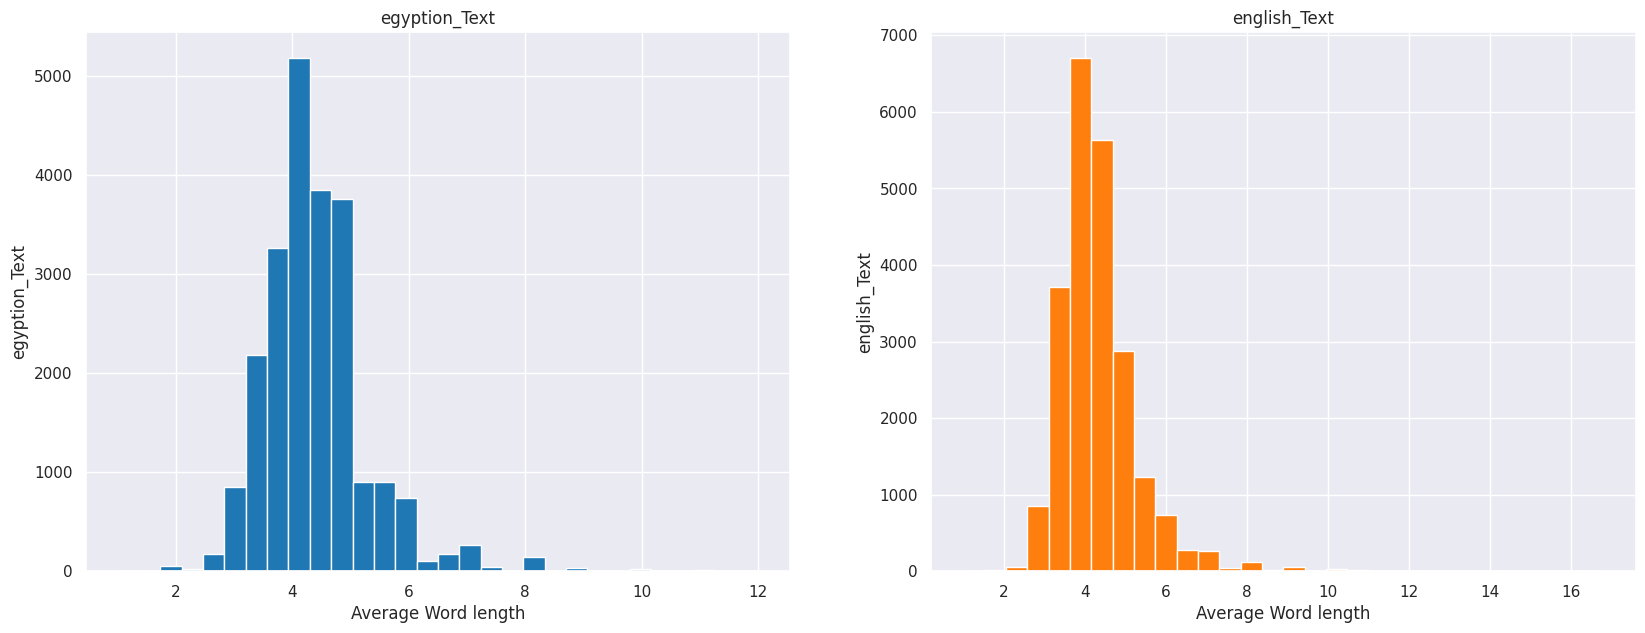

In [24]:
fig,plotcanvas=plt.subplots(1,2,figsize=(20,7))
cols = data.columns.tolist()[:2]
colors = list(mcolors.TABLEAU_COLORS.values())
for y in range(2):
    sentlen = data[cols[y]].str.len()
    plotcanvas[y].hist(data[cols[y]].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)), color = colors[y], bins=30)
    plotcanvas[y].set_title(cols[y])
    plotcanvas[y].set_xlabel('Average Word length')
    plotcanvas[y].set_ylabel(cols[y])

<a id="13"></a>

## *Most Frequent Words* :


In [25]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

In [26]:
def plot_top_non_stopwords_barchart(text, types):
    if types == 'ar':
        stop=set(stopwords.words('arabic'))

        new= text.str.split()
        new=new.values.tolist()
        corpus=[word for i in new for word in i]

        counter=Counter(corpus)
        most=counter.most_common()
        x, y=[], []
        for word,count in most[:30]:
            if (word not in stop):
                word = get_display(arabic_reshaper.reshape(word))
                x.append(word)
                y.append(count)
    elif types == 'en':
        stop=set(stopwords.words('english'))

        new= text.str.split()
        new=new.values.tolist()
        corpus=[word for i in new for word in i]

        counter=Counter(corpus)
        most=counter.most_common()
        x, y=[], []
        for word,count in most[:30]:
            if (word not in stop):
                x.append(word)
                y.append(count)
            
    return x,y

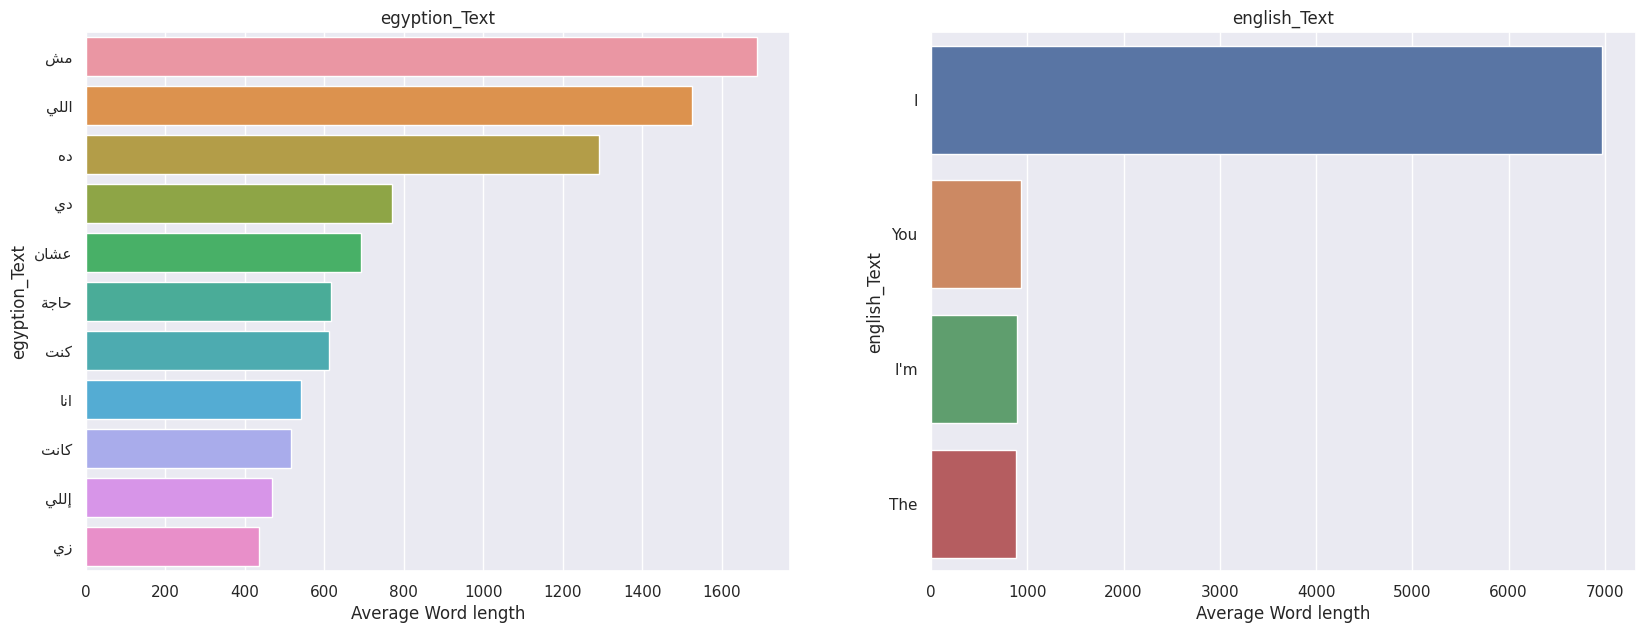

In [27]:
fig,plotcanvas=plt.subplots(1,2,figsize=(20,7))
cols = data.columns.tolist()[:2]
types = ['ar', 'en']
for t in range(2):
    x, y = plot_top_non_stopwords_barchart(data[cols[t]],types[t])
    sns.barplot(x=y,y=x, ax = plotcanvas[t])
    plotcanvas[t].set_title(cols[t])
    plotcanvas[t].set_xlabel('Average Word length')
    plotcanvas[t].set_ylabel(cols[t])

<a id="14"></a>

## 7. *Visualizing Categories Using Pie Chart* :

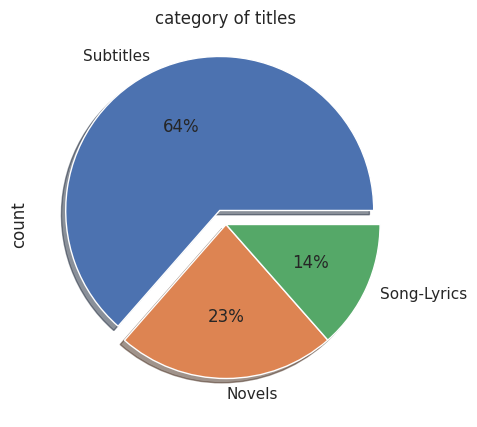

In [28]:
plt.figure(figsize=(15,5))
highlight =(0.1,0,0)

data['category'].value_counts().plot(kind='pie', autopct= '%1.0f%%', shadow=True,explode=highlight)
plt.title('category of titles')
plt.show()

<a id="16"></a>

## 9. *Number of Characters Present in Each Sentence of Description According to the Category*:

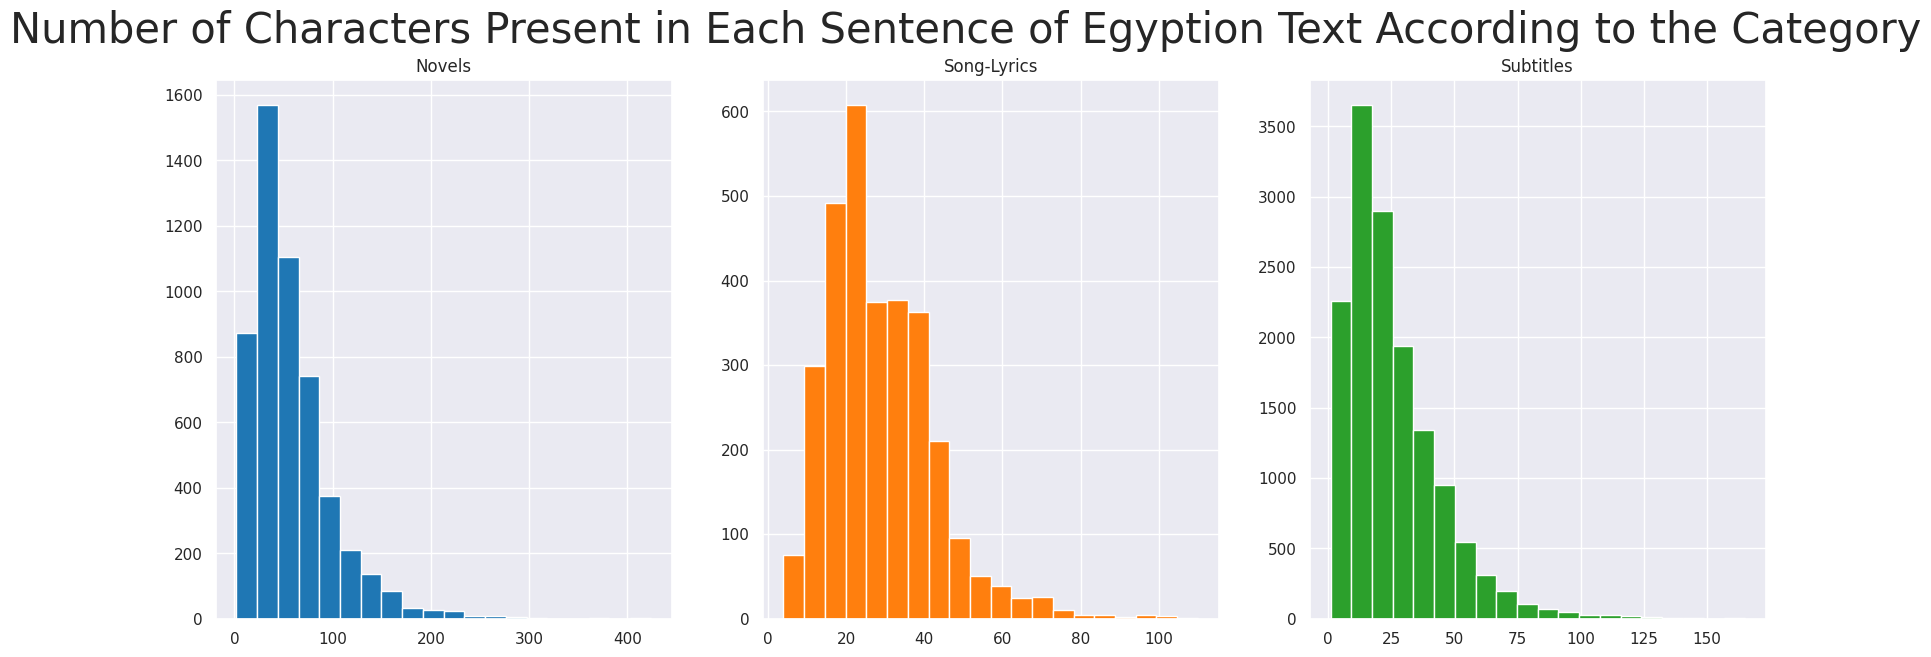

In [29]:
fig,plotcanvas=plt.subplots(1,3,figsize=(20,7))
cols = data.category.unique().tolist()
count = 0
for y in range(3):
    sentlen = data[data['category'] == cols[count]]['egyption_Text'].str.len()
    plotcanvas[y].hist(sentlen, color = colors[count], bins=20)
    plotcanvas[y].set_title(cols[count])
    count +=1

fig.suptitle('Number of Characters Present in Each Sentence of Egyption Text According to the Category',fontsize = 30)
plt.show()

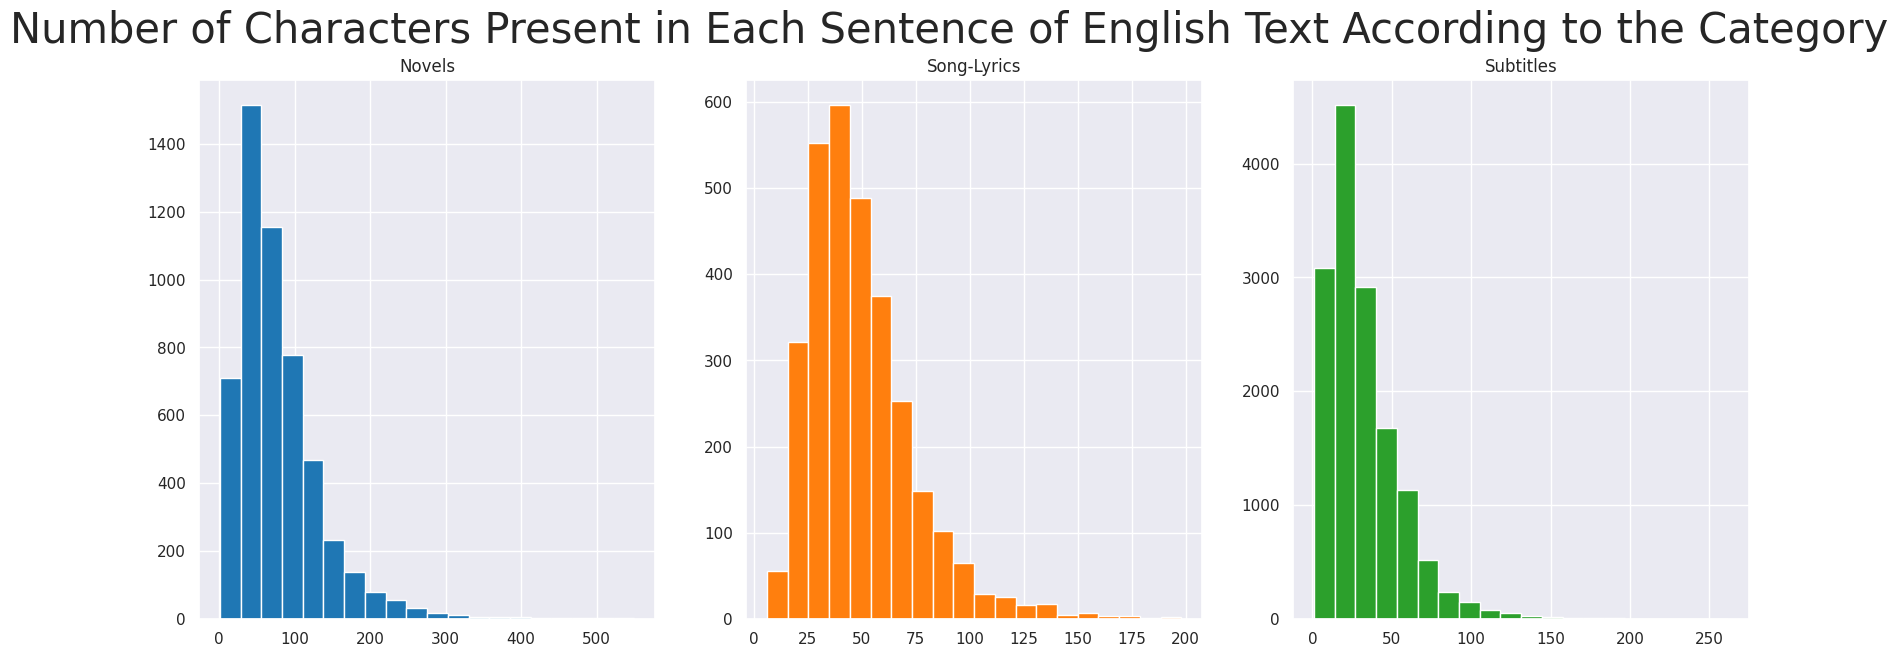

In [30]:
fig,plotcanvas=plt.subplots(1,3,figsize=(20,7))
cols = data.category.unique().tolist()
count = 0
for y in range(3):
    sentlen = data[data['category'] == cols[count]]['english_Text'].str.len()
    plotcanvas[y].hist(sentlen, color = colors[count], bins=20)
    plotcanvas[y].set_title(cols[count])
    count +=1

fig.suptitle('Number of Characters Present in Each Sentence of English Text According to the Category',fontsize = 30)
plt.show()

<a id="17"></a>
## *Number of Words Appearing in Each Sentence According To The Category* :

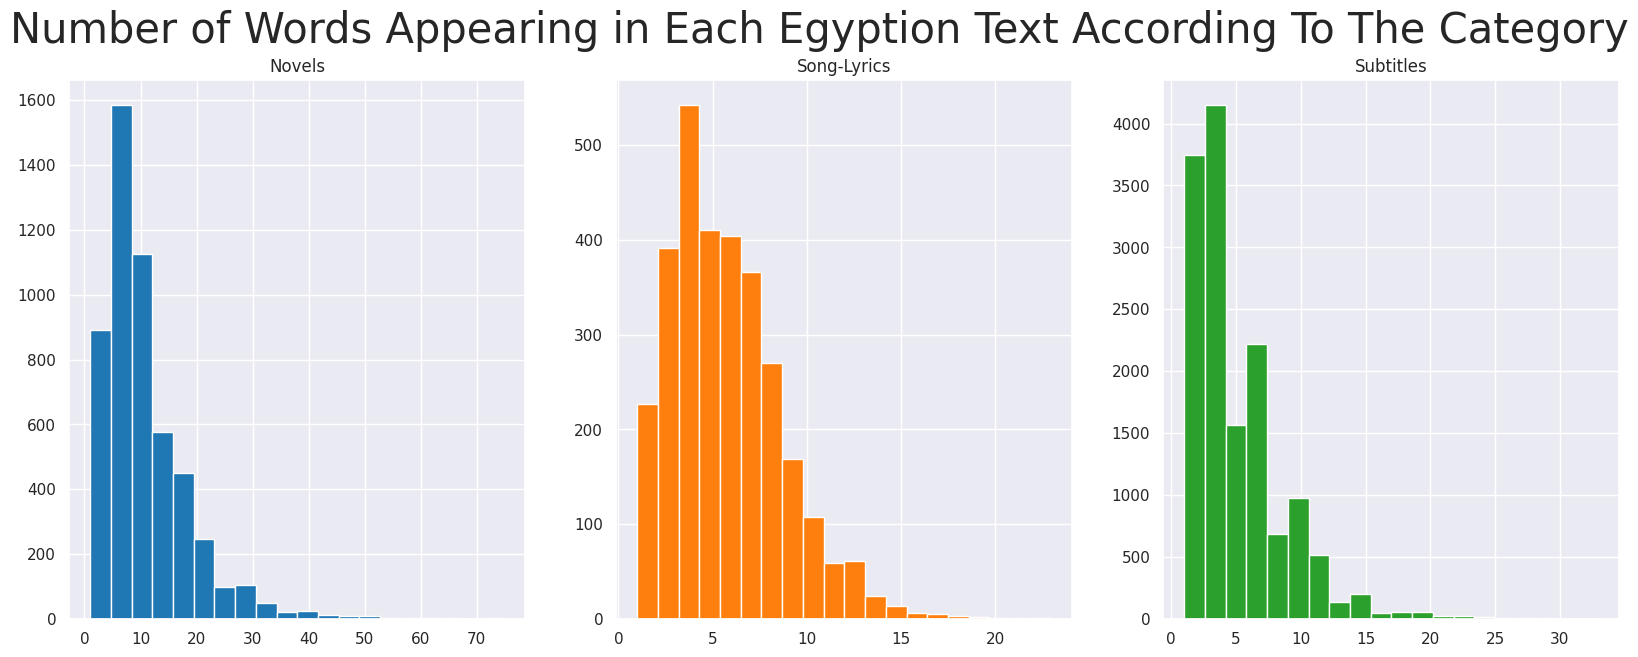

In [31]:
fig,plotcanvas=plt.subplots(1,3,figsize=(20,7))
cols = data.category.unique().tolist()
count = 0

for y in range(3):
    sentlen = data[data['category'] == cols[count]]['egyption_Text'].str.split().map(lambda x: len(x))
    plotcanvas[y].hist(sentlen, color = colors[count], bins=20)
    plotcanvas[y].set_title(cols[count])
    count +=1

fig.suptitle('Number of Words Appearing in Each Egyption Text According To The Category', fontsize = 30)
plt.show()

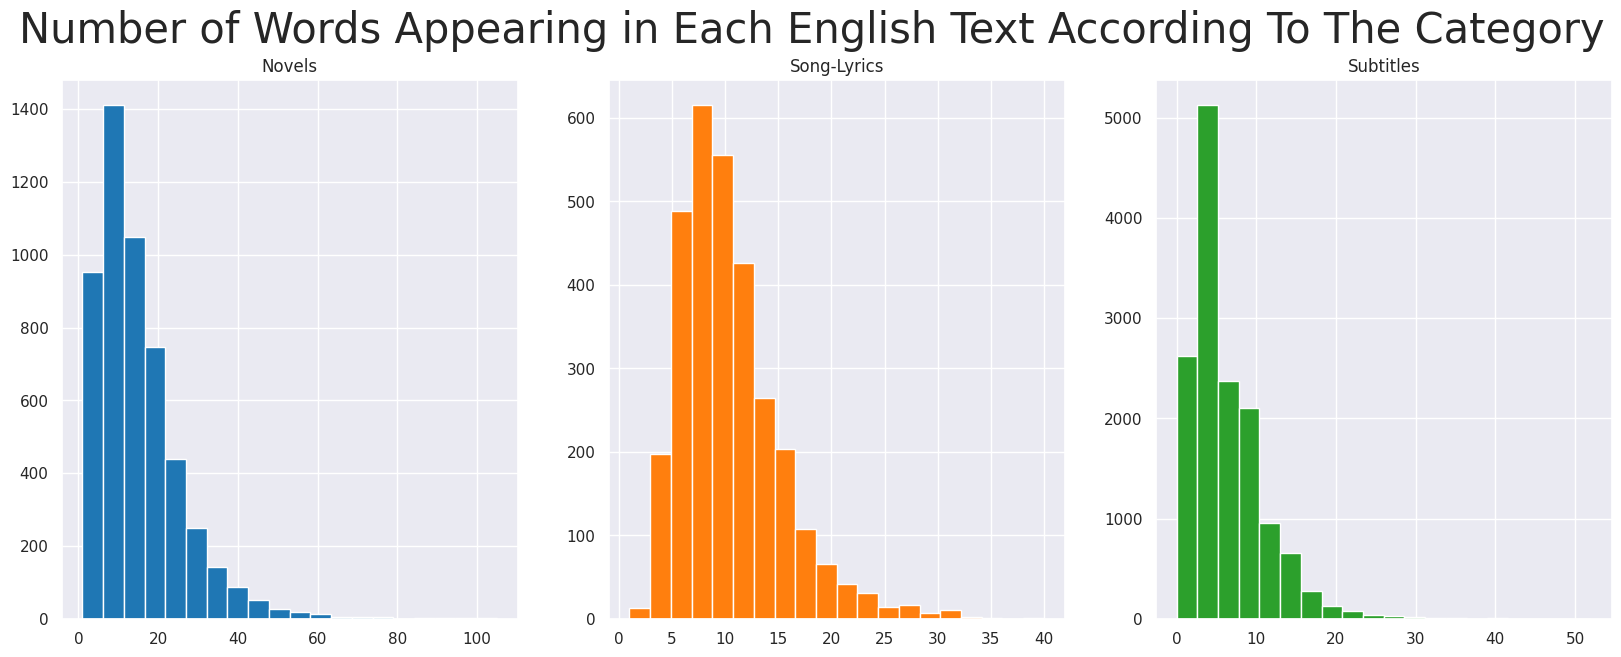

In [32]:
fig,plotcanvas=plt.subplots(1,3,figsize=(20,7))
cols = data.category.unique().tolist()
count = 0

for y in range(3):
    sentlen = data[data['category'] == cols[count]]['english_Text'].str.split().map(lambda x: len(x))
    plotcanvas[y].hist(sentlen, color = colors[count], bins=20)
    plotcanvas[y].set_title(cols[count])
    count +=1

fig.suptitle('Number of Words Appearing in Each English Text According To The Category', fontsize = 30)
plt.show()

<a id="18"></a>

## 11. *Average Word Length in Each Sentence For Each Category* :

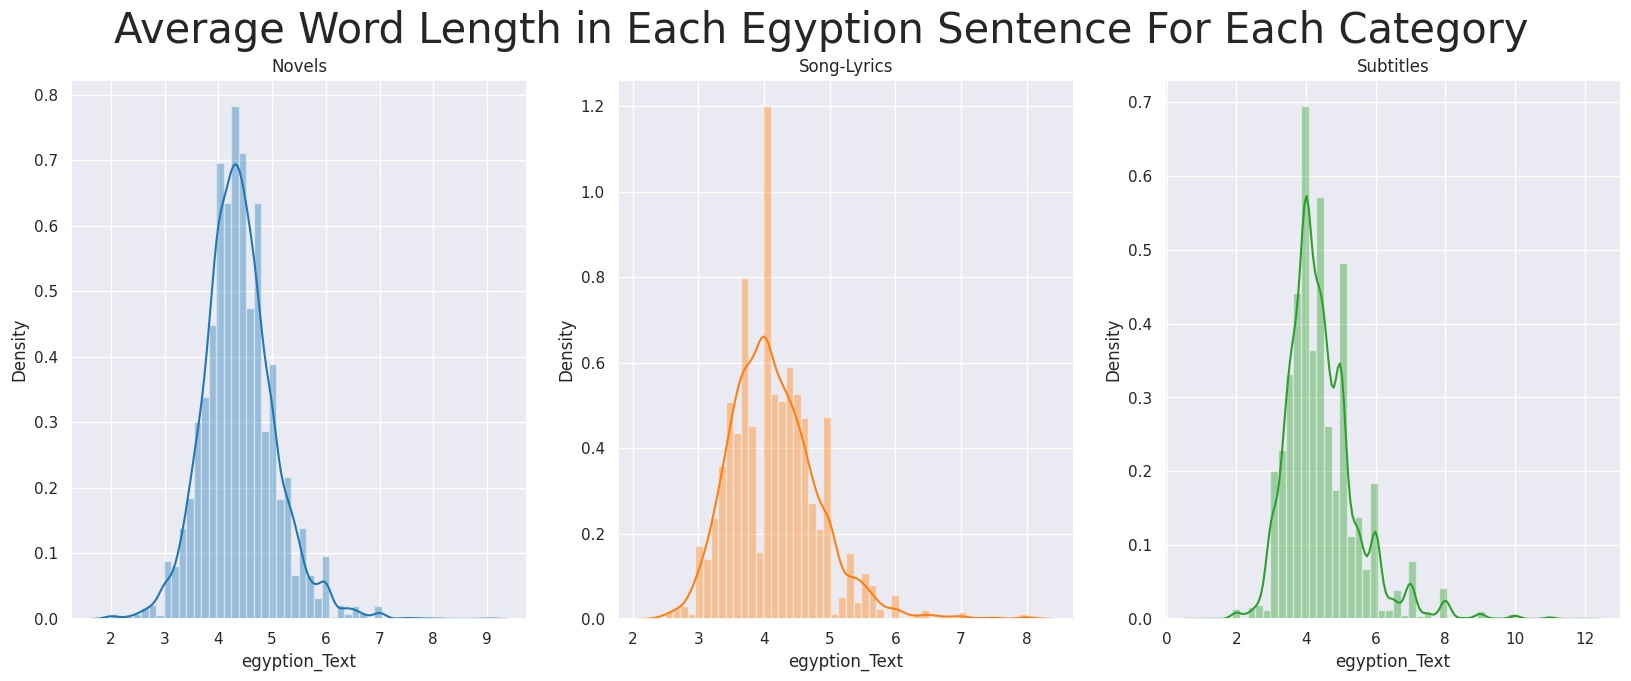

In [33]:
fig,plotcanvas=plt.subplots(1,3,figsize=(20,7))
cols = data.category.unique().tolist()
count = 0
dictArabic = {}
for y in range(3):
    word = data[data['category']== cols[count]]['egyption_Text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
    sns.distplot(word,ax= plotcanvas[y], color = colors[count])
    plotcanvas[y].set_title(cols[count])
    dictArabic.update({cols[count]:[max(word), min(word), np.mean(word)]})
    count +=1

fig.suptitle('Average Word Length in Each Egyption Sentence For Each Category', fontsize=30)
plt.show()

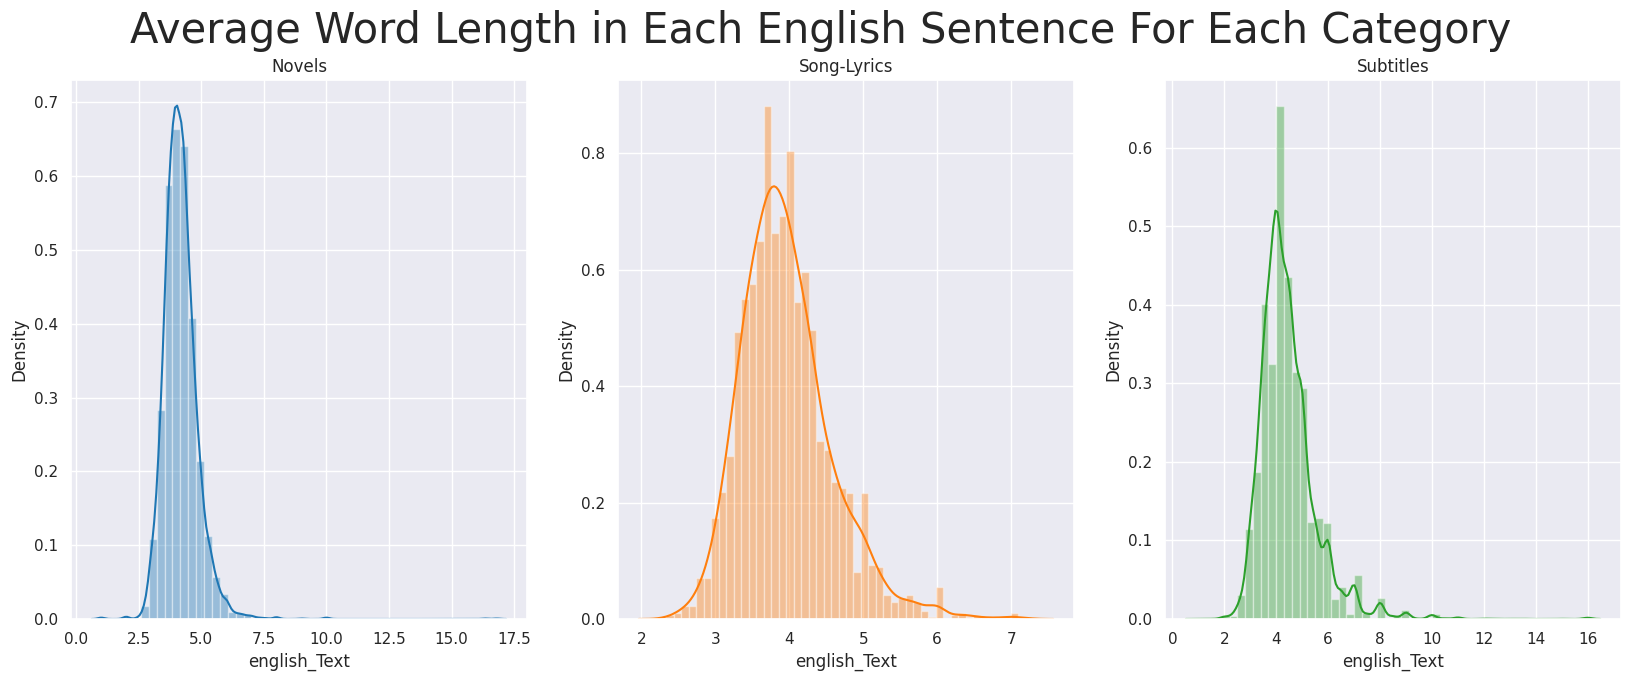

In [34]:
fig,plotcanvas=plt.subplots(1,3,figsize=(20,7))
cols = data.category.unique().tolist()
count = 0
dictEnglish = {}
for y in range(3):
    word = data[data['category']== cols[count]]['english_Text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
    sns.distplot(word,ax= plotcanvas[y], color = colors[count])
    plotcanvas[y].set_title(cols[count])
    dictEnglish.update({cols[count]:[max(word), min(word), np.mean(word)]})
    count +=1

fig.suptitle('Average Word Length in Each English Sentence For Each Category', fontsize=30)
plt.show()

In [35]:
for i,j in dictArabic.items():
    print(f"Category of {i:5s} in the Arabic has max ={j[0]: >0.3f}\t, min = {j[1]: >0.3f}\t, mean = {j[2]: >0.3f}.")

Category of Novels in the Arabic has max =9.000	, min = 2.000	, mean = 4.389.
Category of Song-Lyrics in the Arabic has max =8.000	, min = 2.500	, mean = 4.149.
Category of Subtitles in the Arabic has max =12.000	, min = 1.000	, mean = 4.438.


In [36]:
for i,j in dictEnglish.items():
    print(f"Category of {i:5s} in the English has max ={j[0]: >0.3f}\t, min = {j[1]: >0.3f}\t, mean = {j[2]: >0.3f}.")

Category of Novels in the English has max =16.800	, min = 1.000	, mean = 4.176.
Category of Song-Lyrics in the English has max =7.200	, min = 2.333	, mean = 3.959.
Category of Subtitles in the English has max =16.000	, min = 1.000	, mean = 4.449.


<a id="19"></a>

## *Generating Word Cloud For Sentences* :

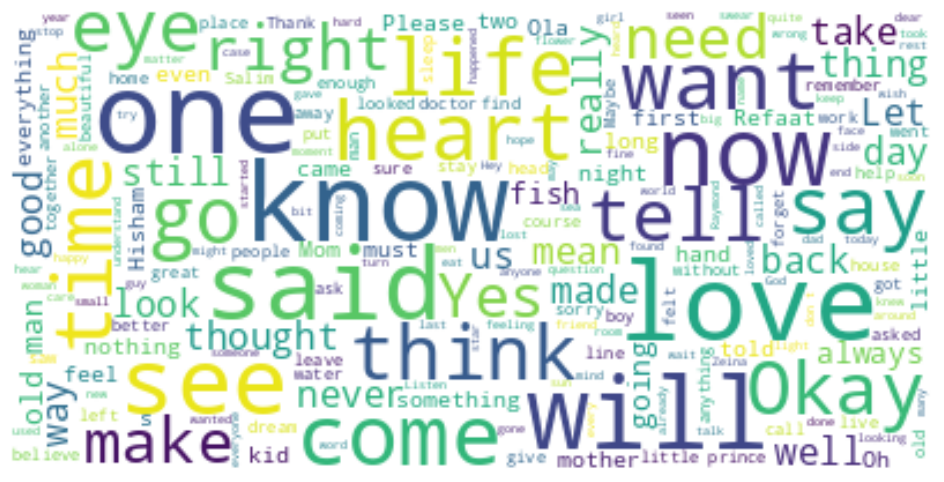

In [37]:
text = " ".join(desc for desc in data["english_Text"])

wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white").generate(text)
plt.figure(figsize=(14,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

downloading and unzipping arabic font: /opt/conda/lib/python3.10/site-packages/ar_wordcloud/fonts/NotoNaskhArabic-unhinted.zip .. 
downloading and unzipping arabic font: /opt/conda/lib/python3.10/site-packages/ar_wordcloud/fonts/NotoSansArabic-unhinted.zip .. 
downloading and unzipping arabic font: /opt/conda/lib/python3.10/site-packages/ar_wordcloud/fonts/NotoKufiArabic-unhinted.zip .. 


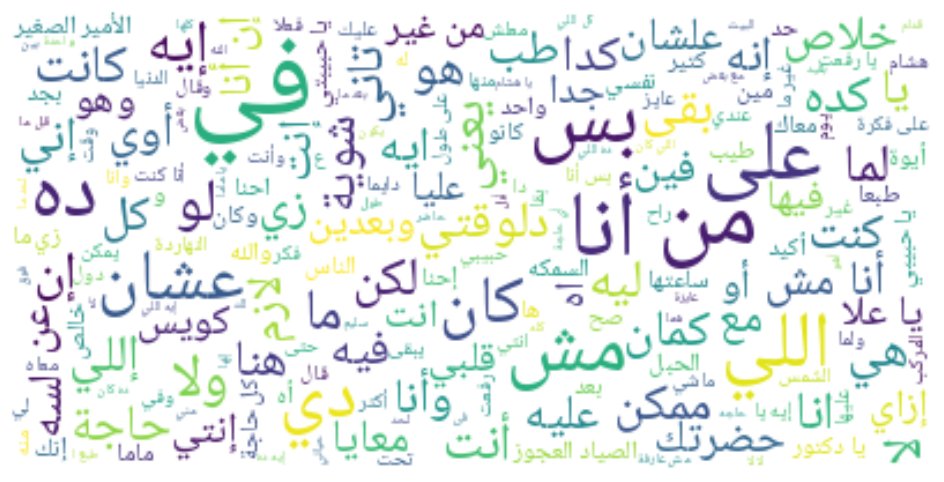

In [38]:
text = " ".join(desc for desc in data["egyption_Text"])
# Reshape the text
wordcloud = ArabicWordCloud(max_font_size=50, max_words=200, background_color="white").generate(text)
plt.figure(figsize=(14,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<a id="20"></a>

## *Generating Word Cloud For description per category* :

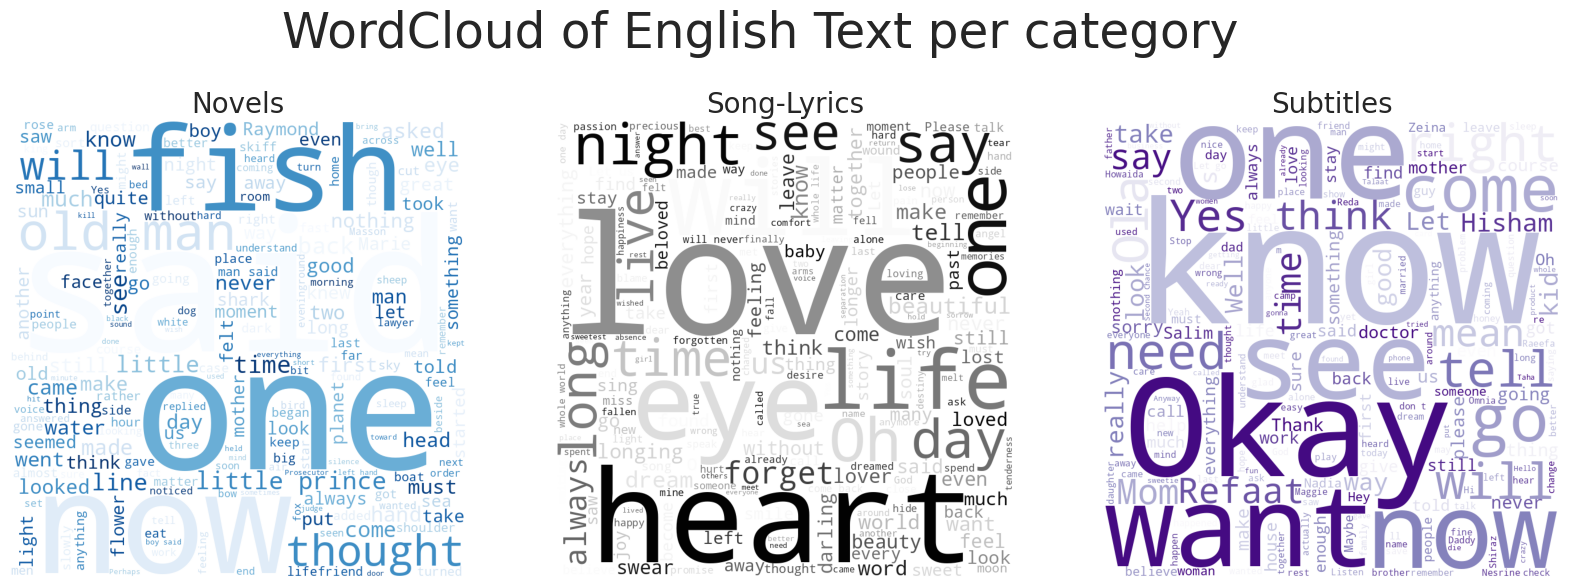

In [39]:
fig,plotcanvas=plt.subplots(1,3,figsize=(20,7))
cols = data.category.unique().tolist()
count = 0
colorr = ["Blues",'Greys','Purples']

for y in range(3):
    text = " ".join(desc for desc in data[data['category']== cols[count]]['english_Text'])
    wordcloud1 = WordCloud(width = 800, height = 800, 
            background_color ='white',
            colormap=colorr[count], 
            min_font_size = 10).generate(text) 
    plotcanvas[y].imshow(wordcloud1)
    plotcanvas[y].axis('off')
    plotcanvas[y].set_title(cols[count], fontsize = 20)
    count +=1
fig.suptitle('WordCloud of English Text per category', fontsize = 35)
plt.show()

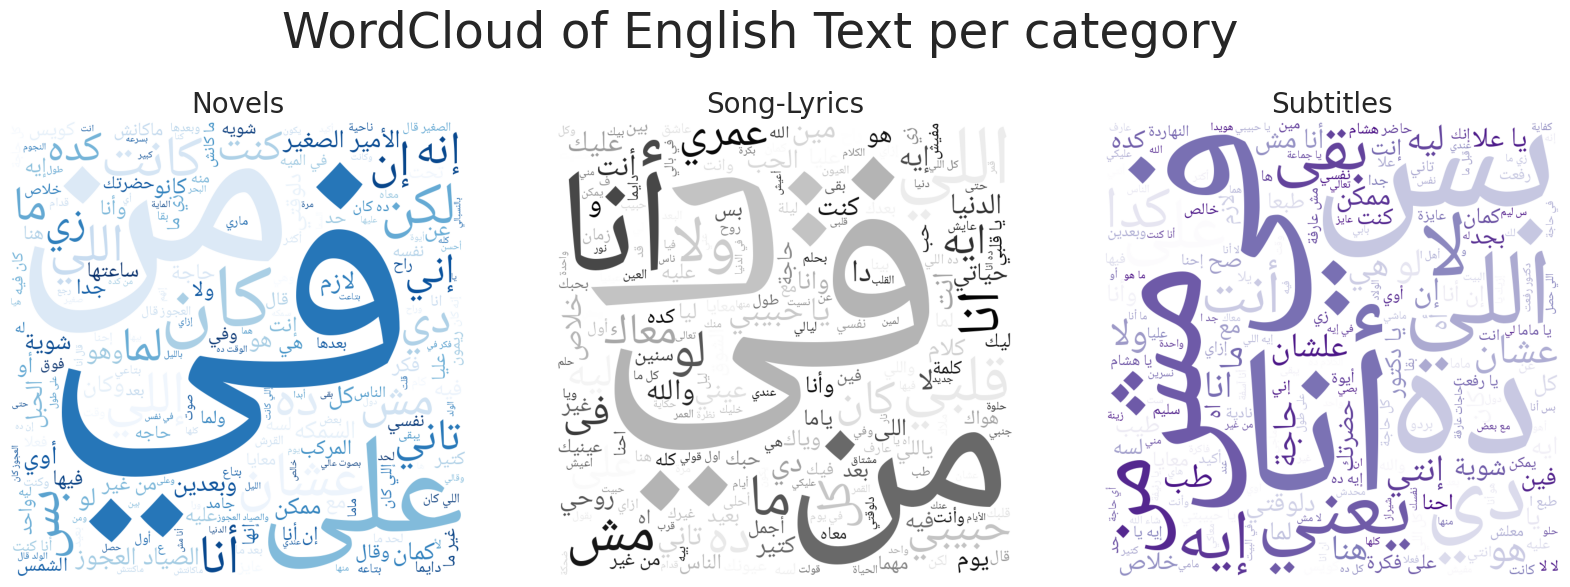

In [40]:

fig,plotcanvas=plt.subplots(1,3,figsize=(20,7))
cols = data.category.unique().tolist()
count = 0
colorr = ["Blues",'Greys','Purples']

for y in range(3):
    text = " ".join(desc for desc in data[data['category']== cols[count]]['egyption_Text'])
    wordcloud1 = ArabicWordCloud(width = 800, height = 800, 
            background_color ='white',
            colormap=colorr[count], 
            min_font_size = 10).generate(text) 
    plotcanvas[y].imshow(wordcloud1)
    plotcanvas[y].axis('off')
    plotcanvas[y].set_title(cols[count], fontsize = 20)
    count +=1
fig.suptitle('WordCloud of English Text per category', fontsize = 35)
plt.show()

###  *Let's observe the word cloud without considering the stop words, as the current representation shows the most frequent words, which predominantly consist of stop words.* :

In [41]:
STOPWORDSENG = set(stopwords.words('english'))
STOPWORDSAR = set(stopwords.words('arabic'))

def remove_stopwordsAR(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDSAR])
def remove_stopwordsENG(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDSENG])
data['english_text_no_stopwords'] = data['english_Text'].apply(lambda text:  remove_stopwordsENG(text))
data['egyption_text_no_stopwords'] = data['egyption_Text'].apply(lambda text:  remove_stopwordsAR(text))

data.head()

egyption_Text  \
0                                      الأمير الصغير   
1                            أنطوان دي سانت إكزوبيري   
2                                        الفصل الأول   
3  في مره، لما كان عندي ست سنين، شفت صوره روعه، ف...   
4      وكانت عباره عن تعبان من نوع البوا بيبلع فهد.    

                                        english_Text category  \
0                                 The little prince    Novels   
1                            Antoine De Saint-Exuper   Novels   
2                                          Chapter 1   Novels   
3  Once when I was six years old I saw a magnific...   Novels   
4  It was a picture of a boa constrictor in the a...   Novels   

        sub_category  number_of_characters_english_text  \
0  the-little-prince                                 18   
1  the-little-prince                                 23   
2  the-little-prince                                  9   
3  the-little-prince                                128   
4  the-little-prince                                 73   

   number_of_characters_egyption_text  number_of_words_english_text  \
0                                  13                             3   
1                                  23                             3   
2                                  11                             2   
3                                 110                            24   
4                                  45                            15   

   number_of_words_egyption_text  \
0                              2   
1                              4   
2                              2   
3                             23   
4                              9   

                           english_text_no_stopwords  \
0                                  The little prince   
1                            Antoine De Saint-Exuper   
2                                          Chapter 1   
3  Once I six years old I saw magnificent picture...   
4  It picture boa constrictor act swallowing animal.   

                          egyption_text_no_stopwords  
0                                      الأمير الصغير  
1                            أنطوان دي سانت إكزوبيري  
2                                        الفصل الأول  
3  مره، عندي سنين، شفت صوره روعه، كتاب الغابات إل...  
4             وكانت عباره تعبان نوع البوا بيبلع فهد.

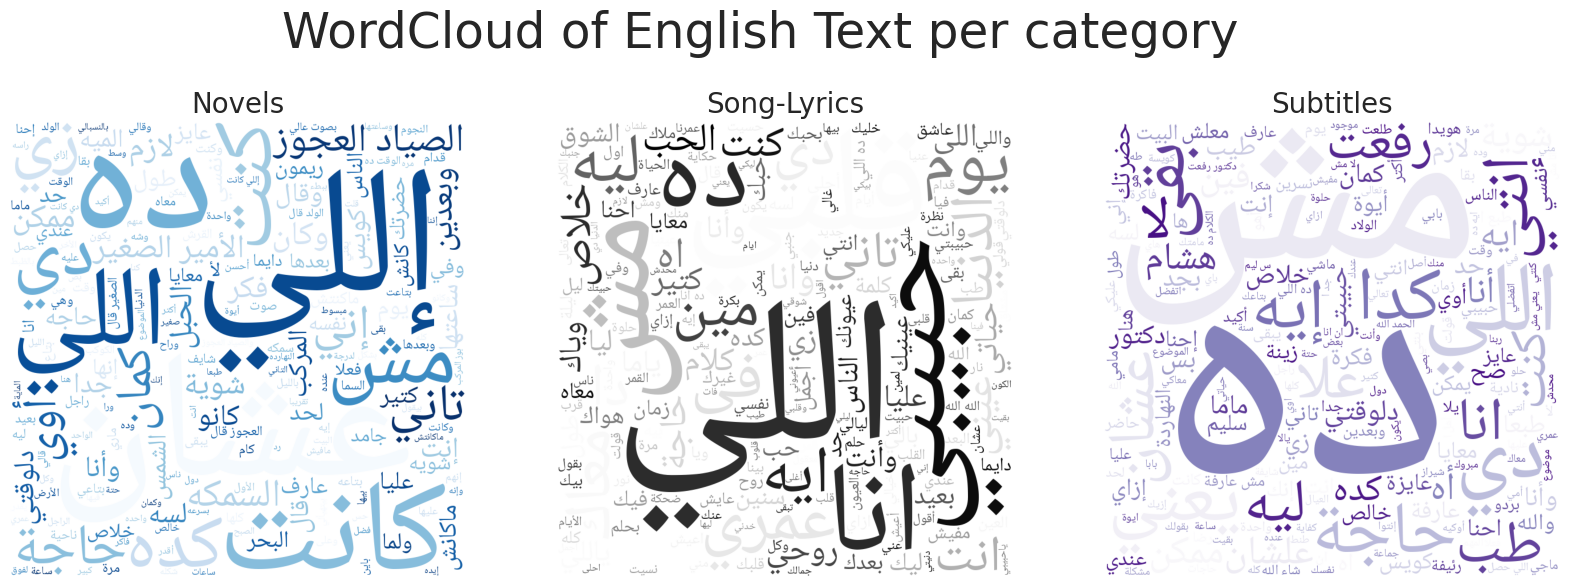

In [42]:
fig,plotcanvas=plt.subplots(1,3,figsize=(20,7))
cols = data.category.unique().tolist()
count = 0
colorr = ["Blues",'Greys','Purples']

for y in range(3):
    text = " ".join(desc for desc in data[data['category']== cols[count]]['egyption_text_no_stopwords'])
    wordcloud1 = ArabicWordCloud(width = 800, height = 800, 
            background_color ='white',
            colormap=colorr[count], 
            min_font_size = 10).generate(text) 
    plotcanvas[y].imshow(wordcloud1)
    plotcanvas[y].axis('off')
    plotcanvas[y].set_title(cols[count], fontsize = 20)
    count +=1
fig.suptitle('WordCloud of English Text per category', fontsize = 35)
plt.show()

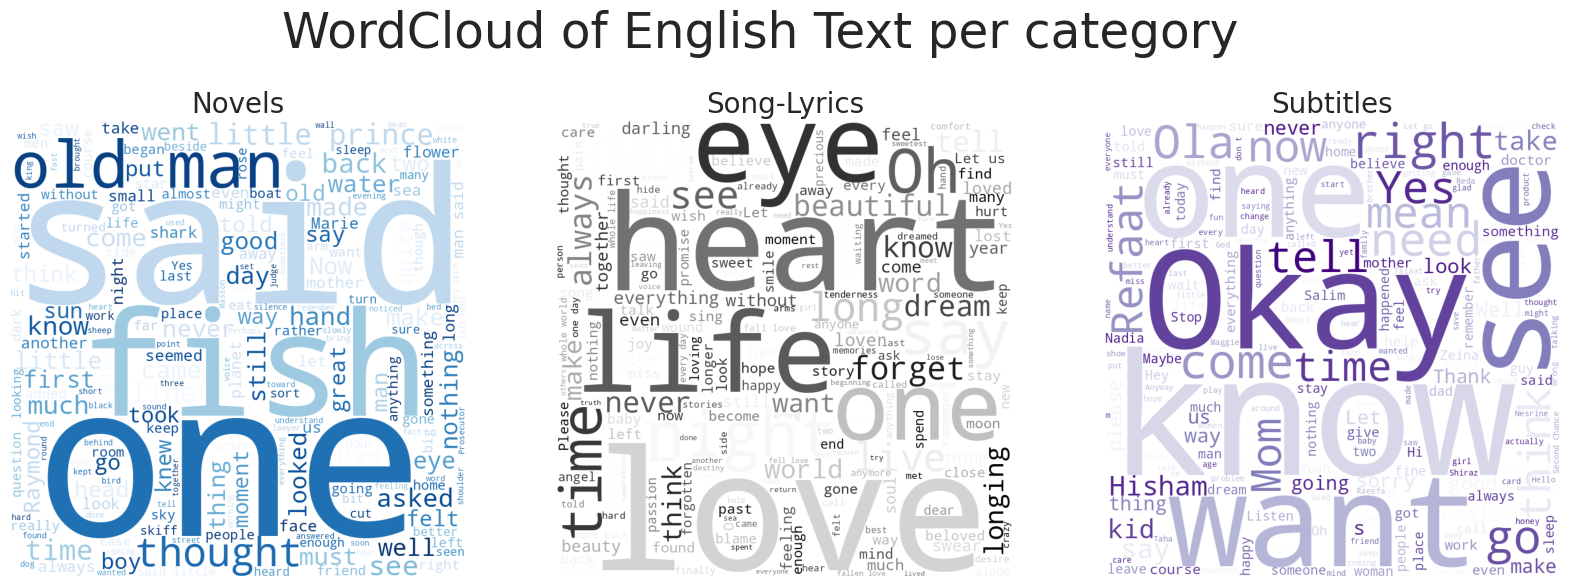

In [43]:
fig,plotcanvas=plt.subplots(1,3,figsize=(20,7))
cols = data.category.unique().tolist()
count = 0
colorr = ["Blues",'Greys','Purples']

for y in range(3):
    text = " ".join(desc for desc in data[data['category']== cols[count]]['english_text_no_stopwords'])
    wordcloud1 = WordCloud(width = 800, height = 800, 
            background_color ='white',
            colormap=colorr[count], 
            min_font_size = 10).generate(text) 
    plotcanvas[y].imshow(wordcloud1)
    plotcanvas[y].axis('off')
    plotcanvas[y].set_title(cols[count], fontsize = 20)
    count +=1
fig.suptitle('WordCloud of English Text per category', fontsize = 35)
plt.show()

---------
<a id="21"></a>

<p style="background-color:#ADD8E6;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:20px 20px;">Tokenization</p>
<a href="#0" style="background-color: #e7e7e7;
  color: #008CBA;
  border: none;
  padding: 5px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
  border-radius: 100%;">Back</a>

In [44]:
data_tokens = data.copy()
data_tokens.drop(["number_of_words_english_text","number_of_characters_egyption_text",
                  "number_of_words_egyption_text","number_of_characters_english_text",
                  "egyption_text_no_stopwords","english_text_no_stopwords",
                  "category","sub_category"], axis=1, inplace=True)

In [45]:
data_tokens

egyption_Text  \
0                                          الأمير الصغير   
1                                أنطوان دي سانت إكزوبيري   
2                                            الفصل الأول   
3      في مره، لما كان عندي ست سنين، شفت صوره روعه، ف...   
4          وكانت عباره عن تعبان من نوع البوا بيبلع فهد.    
...                                                  ...   
26067                       لا مزيد من المتاهات يا عزيزي   
26068                        ربما ألعاب أخرى أكثر امتاعا   
26070                             أوعى تسلم عقلك يا رفعت   
26072                    قانون رفعت رقم واحد بعد التعديل   
26073              بالتأكيد هناك ما يسمى ما وراء الطبيعة   

                                            english_Text  
0                                     The little prince   
1                                Antoine De Saint-Exuper  
2                                              Chapter 1  
3      Once when I was six years old I saw a magnific...  
4      It was a picture of a boa constrictor in the a...  
...                                                  ...  
26067                          No more mazes, my friend.  
26068  Perhaps we should play some other games that a...  
26070                   Never give up your mind, Refaat.  
26072                    Refaat’s law number one amended  
26073  There is definitely such a thing as the parano...  

[22688 rows x 2 columns]

---------
<a id="22"></a>

## Facebook-NLLB-200-Distilled-600M 

In [46]:
from transformers import NllbTokenizer
nllb_tokenizer =  NllbTokenizer.from_pretrained('facebook/nllb-200-distilled-600M', src_lang='eng_Latn', tgt_lang = 'arz_Arab')

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

the `lang_code_to_id` attribute is deprecated. The logic is natively handled in the `tokenizer.adder_tokens_decoder` this attribute will be removed in `transformers` v4.38
the `fairseq_tokens_to_ids` attribute is deprecated. The logic is natively handled in the `tokenizer.adder_tokens_decoder` this attribute will be removed in `transformers` v4.38
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [47]:
data_tokens['nllb_english_tokens'] = data_tokens['english_Text'].map(lambda x: nllb_tokenizer(text_target = x)['input_ids'])
data_tokens['nllb_egyption_tokens'] = data_tokens['egyption_Text'].map(lambda x: nllb_tokenizer.encode(x))
data_tokens

egyption_Text  \
0                                          الأمير الصغير   
1                                أنطوان دي سانت إكزوبيري   
2                                            الفصل الأول   
3      في مره، لما كان عندي ست سنين، شفت صوره روعه، ف...   
4          وكانت عباره عن تعبان من نوع البوا بيبلع فهد.    
...                                                  ...   
26067                       لا مزيد من المتاهات يا عزيزي   
26068                        ربما ألعاب أخرى أكثر امتاعا   
26070                             أوعى تسلم عقلك يا رفعت   
26072                    قانون رفعت رقم واحد بعد التعديل   
26073              بالتأكيد هناك ما يسمى ما وراء الطبيعة   

                                            english_Text  \
0                                     The little prince    
1                                Antoine De Saint-Exuper   
2                                              Chapter 1   
3      Once when I was six years old I saw a magnific...   
4      It was a picture of a boa constrictor in the a...   
...                                                  ...   
26067                          No more mazes, my friend.   
26068  Perhaps we should play some other games that a...   
26070                   Never give up your mind, Refaat.   
26072                    Refaat’s law number one amended   
26073  There is definitely such a thing as the parano...   

                                     nllb_english_tokens  \
0                       [256014, 1617, 24837, 155781, 2]   
1      [256014, 232335, 993, 38135, 248105, 1891, 263...   
2                                [256014, 155051, 94, 2]   
3      [256014, 108792, 8852, 117, 1398, 26881, 12607...   
4      [256014, 3291, 1398, 9, 79658, 452, 9, 33455, ...   
...                                                  ...   
26067  [256014, 1135, 6780, 10758, 33, 248079, 1537, ...   
26068  [256014, 185482, 659, 12516, 18379, 9949, 1060...   
26070  [256014, 71113, 15703, 1738, 4260, 4978, 24807...   
26072  [256014, 1420, 22235, 3, 248066, 10894, 20962,...   
26073  [256014, 14734, 248, 187948, 18660, 9, 17940, ...   

                                    nllb_egyption_tokens  
0                       [256047, 50610, 1856, 232149, 2]  
1      [256047, 2899, 248450, 3832, 9133, 8157, 24811...  
2                        [256047, 16756, 9737, 87378, 2]  
3      [256047, 3424, 222569, 248238, 112474, 7449, 1...  
4      [256047, 132062, 248119, 27309, 4144, 6376, 40...  
...                                                  ...  
26067  [256047, 2797, 21976, 3435, 979, 55231, 1249, ...  
26068  [256047, 47482, 394, 51106, 815, 72705, 50746,...  
26070  [256047, 394, 3720, 248166, 29650, 3050, 45112...  
26072  [256047, 26762, 93113, 6044, 61106, 34274, 874...  
26073  [256047, 158327, 19726, 1890, 72374, 3568, 189...  

[22688 rows x 4 columns]

In [48]:
data_tokens['number_nllb_tokens_english_text'] = data_tokens['nllb_english_tokens'].map(lambda x: len(x))
data_tokens['number_nllb_tokens_egyption_text'] = data_tokens['nllb_egyption_tokens'].map(lambda x: len(x))
print(f"Maximun number of Tokens in Egyption Text is: {data_tokens['number_nllb_tokens_egyption_text'].max()}\n\t\t     while English Tokens is: {data_tokens['number_nllb_tokens_english_text'].max()}\n","-"*30)
print(f"Minimum number of Tokens in Egyption Text is: {data_tokens['number_nllb_tokens_egyption_text'].min()}\n\t\t     while English Tokens is: {data_tokens['number_nllb_tokens_english_text'].min()}\n","-"*30)
print(f"Average number of Tokens in Egyption Text is: {data_tokens['number_nllb_tokens_egyption_text'].mean()}\n\t\t     while English Tokens is: {data_tokens['number_nllb_tokens_english_text'].mean()}\n","-"*30)

Maximun number of Tokens in Egyption Text is: 167
		     while English Tokens is: 141
 ------------------------------
Minimum number of Tokens in Egyption Text is: 3
		     while English Tokens is: 2
 ------------------------------
Average number of Tokens in Egyption Text is: 14.987570521861777
		     while English Tokens is: 14.155853314527503
 ------------------------------


---------
<a id="23"></a>

## Facebook-mBART-Large-cc25 

In [49]:
from transformers import MBart50Tokenizer
mbart_tokenizer = MBart50Tokenizer.from_pretrained("facebook/mbart-large-cc25", src_lang="en_XX", tgt_lang="ar_AR")

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MBartTokenizer'. 
The class this function is called from is 'MBart50Tokenizer'.


In [50]:
data_tokens['mbart_english_tokens'] = data_tokens['english_Text'].map(lambda x: mbart_tokenizer(text_target = x)['input_ids'])
data_tokens['mbart_egyption_tokens'] = data_tokens['egyption_Text'].map(lambda x: mbart_tokenizer.encode(x))
data_tokens

egyption_Text  \
0                                          الأمير الصغير   
1                                أنطوان دي سانت إكزوبيري   
2                                            الفصل الأول   
3      في مره، لما كان عندي ست سنين، شفت صوره روعه، ف...   
4          وكانت عباره عن تعبان من نوع البوا بيبلع فهد.    
...                                                  ...   
26067                       لا مزيد من المتاهات يا عزيزي   
26068                        ربما ألعاب أخرى أكثر امتاعا   
26070                             أوعى تسلم عقلك يا رفعت   
26072                    قانون رفعت رقم واحد بعد التعديل   
26073              بالتأكيد هناك ما يسمى ما وراء الطبيعة   

                                            english_Text  \
0                                     The little prince    
1                                Antoine De Saint-Exuper   
2                                              Chapter 1   
3      Once when I was six years old I saw a magnific...   
4      It was a picture of a boa constrictor in the a...   
...                                                  ...   
26067                          No more mazes, my friend.   
26068  Perhaps we should play some other games that a...   
26070                   Never give up your mind, Refaat.   
26072                    Refaat’s law number one amended   
26073  There is definitely such a thing as the parano...   

                                     nllb_english_tokens  \
0                       [256014, 1617, 24837, 155781, 2]   
1      [256014, 232335, 993, 38135, 248105, 1891, 263...   
2                                [256014, 155051, 94, 2]   
3      [256014, 108792, 8852, 117, 1398, 26881, 12607...   
4      [256014, 3291, 1398, 9, 79658, 452, 9, 33455, ...   
...                                                  ...   
26067  [256014, 1135, 6780, 10758, 33, 248079, 1537, ...   
26068  [256014, 185482, 659, 12516, 18379, 9949, 1060...   
26070  [256014, 71113, 15703, 1738, 4260, 4978, 24807...   
26072  [256014, 1420, 22235, 3, 248066, 10894, 20962,...   
26073  [256014, 14734, 248, 187948, 18660, 9, 17940, ...   

                                    nllb_egyption_tokens  \
0                       [256047, 50610, 1856, 232149, 2]   
1      [256047, 2899, 248450, 3832, 9133, 8157, 24811...   
2                        [256047, 16756, 9737, 87378, 2]   
3      [256047, 3424, 222569, 248238, 112474, 7449, 1...   
4      [256047, 132062, 248119, 27309, 4144, 6376, 40...   
...                                                  ...   
26067  [256047, 2797, 21976, 3435, 979, 55231, 1249, ...   
26068  [256047, 47482, 394, 51106, 815, 72705, 50746,...   
26070  [256047, 394, 3720, 248166, 29650, 3050, 45112...   
26072  [256047, 26762, 93113, 6044, 61106, 34274, 874...   
26073  [256047, 158327, 19726, 1890, 72374, 3568, 189...   

       number_nllb_tokens_english_text  number_nllb_tokens_egyption_text  \
0                                    5                                 5   
1                                    8                                13   
2                                    4                                 5   
3                                   32                                43   
4                                   23                                19   
...                                ...                               ...   
26067                               10                                12   
26068                               16                                11   
26070                               11                                12   
26072                               11                                11   
26073                               14                                12   

                                    mbart_english_tokens  \
0                         [250001, 581, 10176, 54631, 2]   
1      [250001, 180611, 262, 12190, 9, 19279, 34, 126...   
2                               [250001, 117615, 106, 2]   
3     

In [51]:
data_tokens['number_mbart_tokens_english_text'] = data_tokens['mbart_english_tokens'].map(lambda x: len(x))
data_tokens['number_mbart_tokens_egyption_text'] = data_tokens['mbart_egyption_tokens'].map(lambda x: len(x))
print(f"Maximun number of Tokens in Egyption Text is: {data_tokens['number_mbart_tokens_egyption_text'].max()}\n\t\t     while English Tokens is: {data_tokens['number_mbart_tokens_english_text'].max()}\n","-"*30)
print(f"Minimum number of Tokens in Egyption Text is: {data_tokens['number_mbart_tokens_egyption_text'].min()}\n\t\t     while English Tokens is: {data_tokens['number_mbart_tokens_english_text'].min()}\n","-"*30)
print(f"Average number of Tokens in Egyption Text is: {data_tokens['number_mbart_tokens_egyption_text'].mean()}\n\t\t     while English Tokens is: {data_tokens['number_mbart_tokens_english_text'].mean()}\n","-"*30)

Maximun number of Tokens in Egyption Text is: 150
		     while English Tokens is: 141
 ------------------------------
Minimum number of Tokens in Egyption Text is: 3
		     while English Tokens is: 2
 ------------------------------
Average number of Tokens in Egyption Text is: 14.546676657263752
		     while English Tokens is: 14.228138222849083
 ------------------------------


---------
<a id="24"></a>

## Facebook-m2m100_418M

In [52]:
from transformers import M2M100Tokenizer
m2m_tokenizer = M2M100Tokenizer.from_pretrained("facebook/m2m100_418M", src_lang="en", tgt_lang="ar")

tokenizer_config.json:   0%|          | 0.00/298 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/3.71M [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/908 [00:00<?, ?B/s]

In [53]:
data_tokens['m2m_english_tokens'] = data_tokens['english_Text'].map(lambda x: m2m_tokenizer(text_target = x)['input_ids'])
data_tokens['m2m_egyption_tokens'] = data_tokens['egyption_Text'].map(lambda x: m2m_tokenizer.encode(x))
data_tokens

egyption_Text  \
0                                          الأمير الصغير   
1                                أنطوان دي سانت إكزوبيري   
2                                            الفصل الأول   
3      في مره، لما كان عندي ست سنين، شفت صوره روعه، ف...   
4          وكانت عباره عن تعبان من نوع البوا بيبلع فهد.    
...                                                  ...   
26067                       لا مزيد من المتاهات يا عزيزي   
26068                        ربما ألعاب أخرى أكثر امتاعا   
26070                             أوعى تسلم عقلك يا رفعت   
26072                    قانون رفعت رقم واحد بعد التعديل   
26073              بالتأكيد هناك ما يسمى ما وراء الطبيعة   

                                            english_Text  \
0                                     The little prince    
1                                Antoine De Saint-Exuper   
2                                              Chapter 1   
3      Once when I was six years old I saw a magnific...   
4      It was a picture of a boa constrictor in the a...   
...                                                  ...   
26067                          No more mazes, my friend.   
26068  Perhaps we should play some other games that a...   
26070                   Never give up your mind, Refaat.   
26072                    Refaat’s law number one amended   
26073  There is definitely such a thing as the parano...   

                                     nllb_english_tokens  \
0                       [256014, 1617, 24837, 155781, 2]   
1      [256014, 232335, 993, 38135, 248105, 1891, 263...   
2                                [256014, 155051, 94, 2]   
3      [256014, 108792, 8852, 117, 1398, 26881, 12607...   
4      [256014, 3291, 1398, 9, 79658, 452, 9, 33455, ...   
...                                                  ...   
26067  [256014, 1135, 6780, 10758, 33, 248079, 1537, ...   
26068  [256014, 185482, 659, 12516, 18379, 9949, 1060...   
26070  [256014, 71113, 15703, 1738, 4260, 4978, 24807...   
26072  [256014, 1420, 22235, 3, 248066, 10894, 20962,...   
26073  [256014, 14734, 248, 187948, 18660, 9, 17940, ...   

                                    nllb_egyption_tokens  \
0                       [256047, 50610, 1856, 232149, 2]   
1      [256047, 2899, 248450, 3832, 9133, 8157, 24811...   
2                        [256047, 16756, 9737, 87378, 2]   
3      [256047, 3424, 222569, 248238, 112474, 7449, 1...   
4      [256047, 132062, 248119, 27309, 4144, 6376, 40...   
...                                                  ...   
26067  [256047, 2797, 21976, 3435, 979, 55231, 1249, ...   
26068  [256047, 47482, 394, 51106, 815, 72705, 50746,...   
26070  [256047, 394, 3720, 248166, 29650, 3050, 45112...   
26072  [256047, 26762, 93113, 6044, 61106, 34274, 874...   
26073  [256047, 158327, 19726, 1890, 72374, 3568, 189...   

       number_nllb_tokens_english_text  number_nllb_tokens_egyption_text  \
0                                    5                                 5   
1                                    8                                13   
2                                    4                                 5   
3                                   32                                43   
4                                   23                                19   
...                                ...                               ...   
26067                               10                                12   
26068                               16                                11   
26070                               11                                12   
26072                               11                                11   
26073                               14                                12   

                                    mbart_english_tokens  \
0                         [250001, 581, 10176, 54631, 2]   
1      [250001, 180611, 262, 12190, 9, 19279, 34, 126...   
2                               [250001, 117615, 106, 2]   
3     

In [54]:
data_tokens['number_m2m_tokens_english_text'] = data_tokens['m2m_english_tokens'].map(lambda x: len(x))
data_tokens['number_m2m_tokens_egyption_text'] = data_tokens['m2m_egyption_tokens'].map(lambda x: len(x))
print(f"Maximun number of Tokens in Egyption Text is: {data_tokens['number_m2m_tokens_egyption_text'].max()}\n\t\t     while English Tokens is: {data_tokens['number_m2m_tokens_english_text'].max()}\n","-"*30)
print(f"Minimum number of Tokens in Egyption Text is: {data_tokens['number_m2m_tokens_egyption_text'].min()}\n\t\t     while English Tokens is: {data_tokens['number_m2m_tokens_english_text'].min()}\n","-"*30)
print(f"Average number of Tokens in Egyption Text is: {data_tokens['number_m2m_tokens_egyption_text'].mean()}\n\t\t     while English Tokens is: {data_tokens['number_m2m_tokens_english_text'].mean()}\n","-"*30)

Maximun number of Tokens in Egyption Text is: 175
		     while English Tokens is: 147
 ------------------------------
Minimum number of Tokens in Egyption Text is: 3
		     while English Tokens is: 2
 ------------------------------
Average number of Tokens in Egyption Text is: 15.804874823695345
		     while English Tokens is: 14.663963328631876
 ------------------------------


---------
<a id="25"></a>

## Helsinki-NLP-OPUS-mt-en-ar

In [55]:
from transformers import MarianTokenizer
helsinki_tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-ar")

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/917k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.12M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

In [56]:
data_tokens['helsinki_english_tokens'] = data_tokens['english_Text'].map(lambda x: helsinki_tokenizer(text_target = x)['input_ids'])
data_tokens['helsinki_egyption_tokens'] = data_tokens['egyption_Text'].map(lambda x: helsinki_tokenizer.encode(x))
data_tokens

egyption_Text  \
0                                          الأمير الصغير   
1                                أنطوان دي سانت إكزوبيري   
2                                            الفصل الأول   
3      في مره، لما كان عندي ست سنين، شفت صوره روعه، ف...   
4          وكانت عباره عن تعبان من نوع البوا بيبلع فهد.    
...                                                  ...   
26067                       لا مزيد من المتاهات يا عزيزي   
26068                        ربما ألعاب أخرى أكثر امتاعا   
26070                             أوعى تسلم عقلك يا رفعت   
26072                    قانون رفعت رقم واحد بعد التعديل   
26073              بالتأكيد هناك ما يسمى ما وراء الطبيعة   

                                            english_Text  \
0                                     The little prince    
1                                Antoine De Saint-Exuper   
2                                              Chapter 1   
3      Once when I was six years old I saw a magnific...   
4      It was a picture of a boa constrictor in the a...   
...                                                  ...   
26067                          No more mazes, my friend.   
26068  Perhaps we should play some other games that a...   
26070                   Never give up your mind, Refaat.   
26072                    Refaat’s law number one amended   
26073  There is definitely such a thing as the parano...   

                                     nllb_english_tokens  \
0                       [256014, 1617, 24837, 155781, 2]   
1      [256014, 232335, 993, 38135, 248105, 1891, 263...   
2                                [256014, 155051, 94, 2]   
3      [256014, 108792, 8852, 117, 1398, 26881, 12607...   
4      [256014, 3291, 1398, 9, 79658, 452, 9, 33455, ...   
...                                                  ...   
26067  [256014, 1135, 6780, 10758, 33, 248079, 1537, ...   
26068  [256014, 185482, 659, 12516, 18379, 9949, 1060...   
26070  [256014, 71113, 15703, 1738, 4260, 4978, 24807...   
26072  [256014, 1420, 22235, 3, 248066, 10894, 20962,...   
26073  [256014, 14734, 248, 187948, 18660, 9, 17940, ...   

                                    nllb_egyption_tokens  \
0                       [256047, 50610, 1856, 232149, 2]   
1      [256047, 2899, 248450, 3832, 9133, 8157, 24811...   
2                        [256047, 16756, 9737, 87378, 2]   
3      [256047, 3424, 222569, 248238, 112474, 7449, 1...   
4      [256047, 132062, 248119, 27309, 4144, 6376, 40...   
...                                                  ...   
26067  [256047, 2797, 21976, 3435, 979, 55231, 1249, ...   
26068  [256047, 47482, 394, 51106, 815, 72705, 50746,...   
26070  [256047, 394, 3720, 248166, 29650, 3050, 45112...   
26072  [256047, 26762, 93113, 6044, 61106, 34274, 874...   
26073  [256047, 158327, 19726, 1890, 72374, 3568, 189...   

       number_nllb_tokens_english_text  number_nllb_tokens_egyption_text  \
0                                    5                                 5   
1                                    8                                13   
2                                    4                                 5   
3                                   32                                43   
4                                   23                                19   
...                                ...                               ...   
26067                               10                                12   
26068                               16                                11   
26070                               11                                12   
26072                               11                                11   
26073                               14                                12   

                                    mbart_english_tokens  \
0                         [250001, 581, 10176, 54631, 2]   
1      [250001, 180611, 262, 12190, 9, 19279, 34, 126...   
2                               [250001, 117615, 106, 2]   
3     

In [57]:
data_tokens['number_helsinki_tokens_english_text'] = data_tokens['helsinki_english_tokens'].map(lambda x: len(x))
data_tokens['number_helsinki_tokens_egyption_text'] = data_tokens['helsinki_egyption_tokens'].map(lambda x: len(x))
print(f"Maximun number of Tokens in Egyption Text is: {data_tokens['number_helsinki_tokens_egyption_text'].max()}\n\t\t     while English Tokens is: {data_tokens['number_helsinki_tokens_english_text'].max()}\n","-"*30)
print(f"Minimum number of Tokens in Egyption Text is: {data_tokens['number_helsinki_tokens_egyption_text'].min()}\n\t\t     while English Tokens is: {data_tokens['number_helsinki_tokens_english_text'].min()}\n","-"*30)
print(f"Average number of Tokens in Egyption Text is: {data_tokens['number_helsinki_tokens_egyption_text'].mean()}\n\t\t     while English Tokens is: {data_tokens['number_helsinki_tokens_english_text'].mean()}\n","-"*30)

Maximun number of Tokens in Egyption Text is: 424
		     while English Tokens is: 267
 ------------------------------
Minimum number of Tokens in Egyption Text is: 2
		     while English Tokens is: 1
 ------------------------------
Average number of Tokens in Egyption Text is: 34.77128878702398
		     while English Tokens is: 24.567656911142453
 ------------------------------
